In [9]:
"""
Image Processing Laboratory (045108) - Meeting 1/4
Signal and Image Processing Lab (SIPL) & Vision and Image Sciences Lab (VISL)
The Andrew and Enra Viterbi Faculty of Electrical and Computer Engineering
Technion - Israel Institute of Technology
"""

import numpy as np
import matplotlib.pyplot as plt
from skimage import color, exposure, feature, filters, measure, morphology, io, transform, util
from code import flir_image_extractor

# Thermal constants
THERMAL_MIN_VAL = 9620
THERMAL_MAX_VAL = 18070
THERMAL_NUM_BINS = 8451

# Useful tip: pressing Shift+Tab when the cursor is on a function name will display
# the documentation for that function.


# Helper Functions


In [10]:
def visual_prep(filename):
    """
    Prepares an image for the lab by reading, converting to grayscale (if necessary),
    normalizing, and resizing.

    Args:
        filename (str): Path to the image file.

    Returns:
        numpy.ndarray: The prepared image array.
    """

    image = io.imread(filename)
    if len(image.shape) == 3:
       image = color.rgb2gray(image)

    TARGET_WIDTH = 1600
    # Resize the image to TARGET_WIDTH columns keeping the original aspect ratio
    height, width = image.shape
    resize_factor = width / TARGET_WIDTH

    new_height = int(height/resize_factor)
    new_width = TARGET_WIDTH
    image = transform.resize(image, (new_height, new_width), anti_aliasing=True)
    image = util.img_as_ubyte(image)

    return image


def thermal_prep(filename):
    """
    Prepares a FLIR thermal image for the lab by reading it.

    Args:
        filename (str): Path to the FLIR thermal image file.

    Returns:
        numpy.ndarray: The prepared thermal image.
    """

    image_extractor = flir_image_extractor.FlirImageExtractor()
    image_extractor.process_image(filename)
    thermal = image_extractor.extract_thermal_image()

    return thermal


def thermal_prep_uint8(filename):
    """
    Prepares a FLIR thermal image for the lab by reading and converting it to uint8 format.

    Args:
        filename (str): Path to the FLIR thermal image file.

    Returns:
        numpy.ndarray: The prepared thermal image.
    """

    thermal = thermal_prep(filename)

    # Create a copy of the input image
    qth = np.copy(thermal)
    qth = qth.astype(np.float32)

    levels = 256
    # Divide the pixel value range into 'levels' number of buckets
    buckets = np.linspace(THERMAL_MIN_VAL, THERMAL_MAX_VAL, levels + 1)

    # Quantize the image
    count = 0
    for i in range(len(buckets) - 1):
        if i != (len(buckets) - 2):
            qth[(thermal >= buckets[i]) & (thermal < buckets[i + 1])] = count
            count = count + 1
        else:
            qth[(thermal >= buckets[i]) & (thermal <= buckets[i + 1])] = count

    qth = qth.astype(np.uint8)

    return qth


# Preparation


In [ ]:
# Read the image
gradient_image = io.imread('images/gradient.png')

# Show the image
plt.figure()
plt.imshow(gradient_image, cmap='gray')
plt.axis('off')
plt.title('Gradient')
plt.show()

# TODO: Complete the required dynamic ranges for the image
rangeA = ???

# TODO: Show four versions of the image with the above dynamic ranges
#       Use the 'plt.imshow' function with the parameters 'vmin' and 'vmax'
plt.figure()

plt.show()


# Assignment 1 - Image Acquisition


(-0.5, 319.5, 239.5, -0.5)

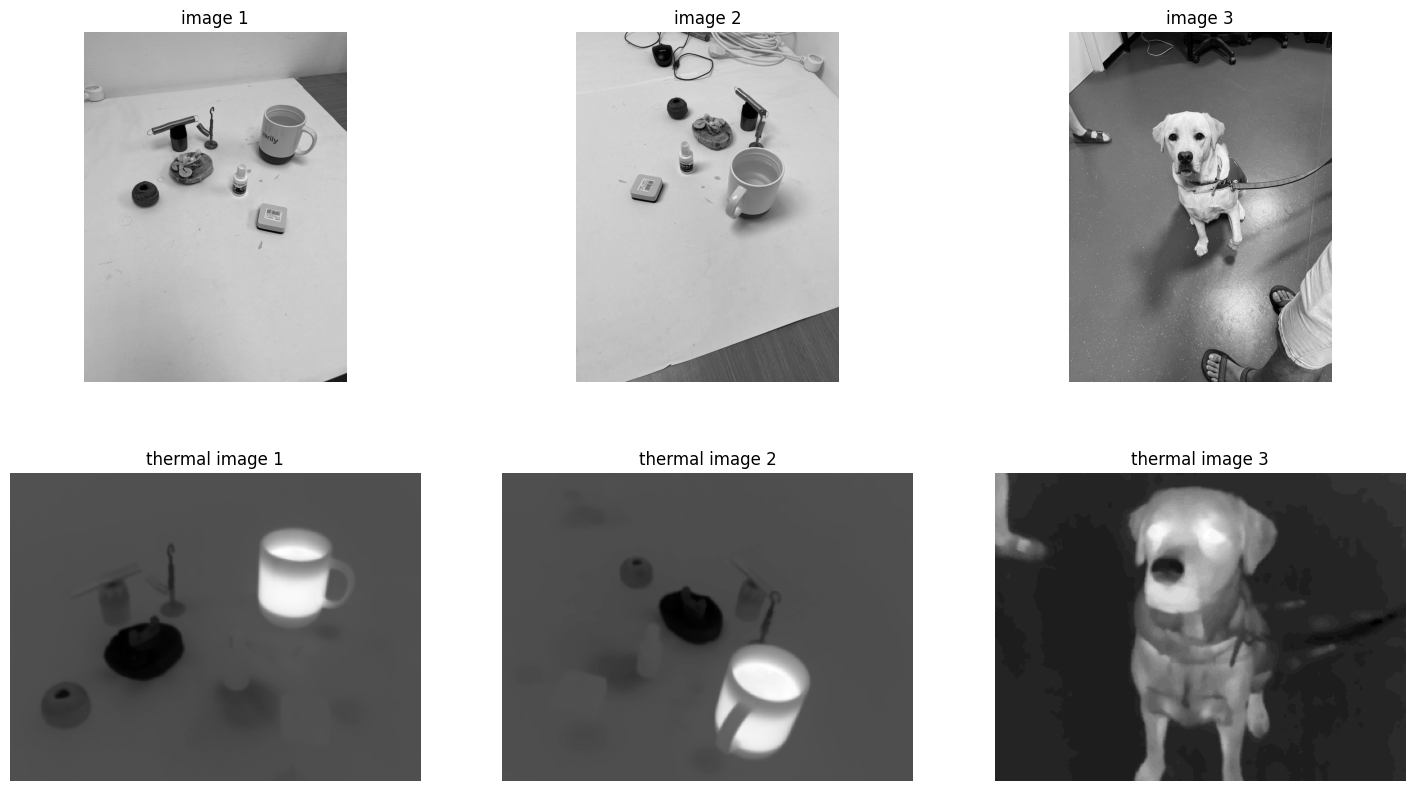

In [16]:
# TODO: Read visual image and prepare it for the lab
visual_image_front = visual_prep('front.jpeg')
visual_image_side = visual_prep('side.jpeg')
visual_image_naknik = visual_prep('naknik.jpeg')

# TODO: Read thermal image and convert it to uint8 format
thermal_image_uint8_front = thermal_prep_uint8('fronttherm.jpg')
thermal_image_uint8_side = thermal_prep_uint8('sidetherm.jpg')
thermal_image_uint8_naknik = thermal_prep_uint8('nakniktherm.jpg')

# TODO: Add two more visual image variables and two more thermal image
#       variables and show the six images
fig=plt.figure( figsize =(18,10))

ax1 = fig.add_subplot(2,3,1)
ax1 = plt.imshow(visual_image_front, cmap = 'gray')
plt.title("image 1")
plt.axis('off')

ax2 = fig.add_subplot(2,3,2)
ax2 = plt.imshow(visual_image_side, cmap = 'gray')
plt.title("image 2")
plt.axis('off')

ax3 = fig.add_subplot(2,3,3)
ax3 = plt.imshow(visual_image_naknik, cmap = 'gray')
plt.title("image 3")
plt.axis('off')

ax4 = fig.add_subplot(2,3,4)
ax4 = plt.imshow(thermal_image_uint8_front, cmap = 'gray')
plt.title("thermal image 1")
plt.axis('off')

ax5 = fig.add_subplot(2,3,5)
ax5 = plt.imshow(thermal_image_uint8_side, cmap = 'gray')
plt.title("thermal image 2")
plt.axis('off')

ax6 = fig.add_subplot(2,3,6)
ax6 = plt.imshow(thermal_image_uint8_naknik, cmap = 'gray')
plt.title("thermal image 3")
plt.axis('off') 


# Assignment 2 - Dynamic Range and Histograms


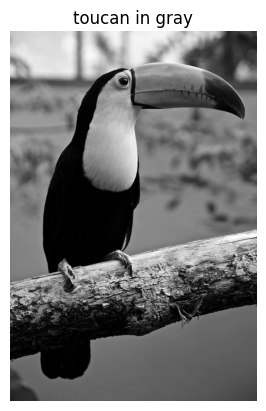

Minimum value: 0
Maximum value: 255
Mean value: 103.19


In [17]:
# Question 1

# TODO: Read an image from the file 'toucan.jpg' using the 'io.imread' function
toucan_image = io.imread('images/toucan.jpg')

# TODO: Show the grayscale image using matplotlib with a grayscale colormap
plt.figure()
plt.imshow(toucan_image, cmap='gray')

# TODO: Set the title of the plot to 'Toucan'
plt.axis('off')
plt.title('toucan in gray')

# TODO: Show the plot
plt.show()

# TODO: Use NumPy to find the requested statistics of the image
min_value = np.min(toucan_image)
max_value = np.max(toucan_image)
mean_value = np.mean(toucan_image)

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")
print(f"Mean value: {mean_value:.2f}")


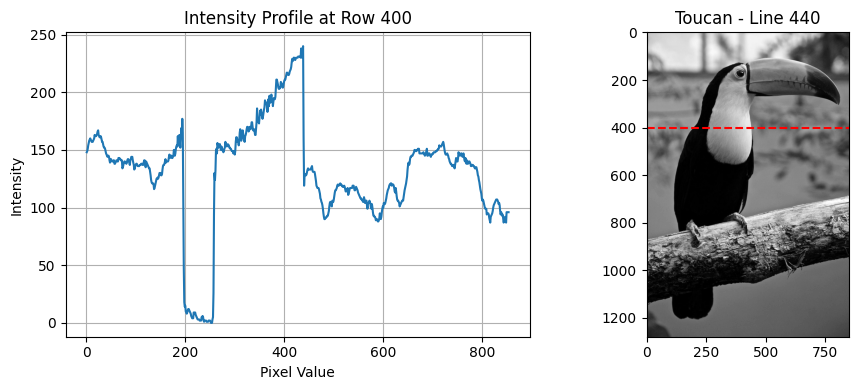

In [20]:
# Question 2

num_columns = toucan_image.shape[1]
row_N = 400

# TODO: Extract the values from the specified row 'row_N' in the 'toucan_image' array
y_axis = toucan_image[row_N, :]

# TODO: Generate an array representing the x-axis values from 1 to 'num_columns'
#       using the 'np.linspace' function
x_axis = np.linspace(1, num_columns,num_columns)

plt.figure(figsize=(10, 4))

# TODO Create the first subplot for intensity profile using matplotlib with
#      a 1x2 grid, occupying the first position
plt.subplot(1,2,1)
# TODO Plot the intensity profile using the x-axis and y-axis values
plt.plot(x_axis,y_axis)
    #plt.title('row 400 of toucan')
    #plt.xlabel('xPosition')
    #plt.ylabel('Intensity')

# TODO Add gridlines to the subplot for better readability using
#      the 'plt.grid' function
plt.grid(True)
plt.xlabel('Pixel Value')
plt.ylabel('Intensity')
plt.title(f"Intensity Profile at Row {row_N}")

# Second subplot: Toucan Image
plt.subplot(1, 2, 2)
plt.axhline(y=row_N, color='red', linestyle='--')
plt.imshow(toucan_image, cmap='gray')
plt.title('Toucan - Line 440')

plt.tight_layout()
plt.show()


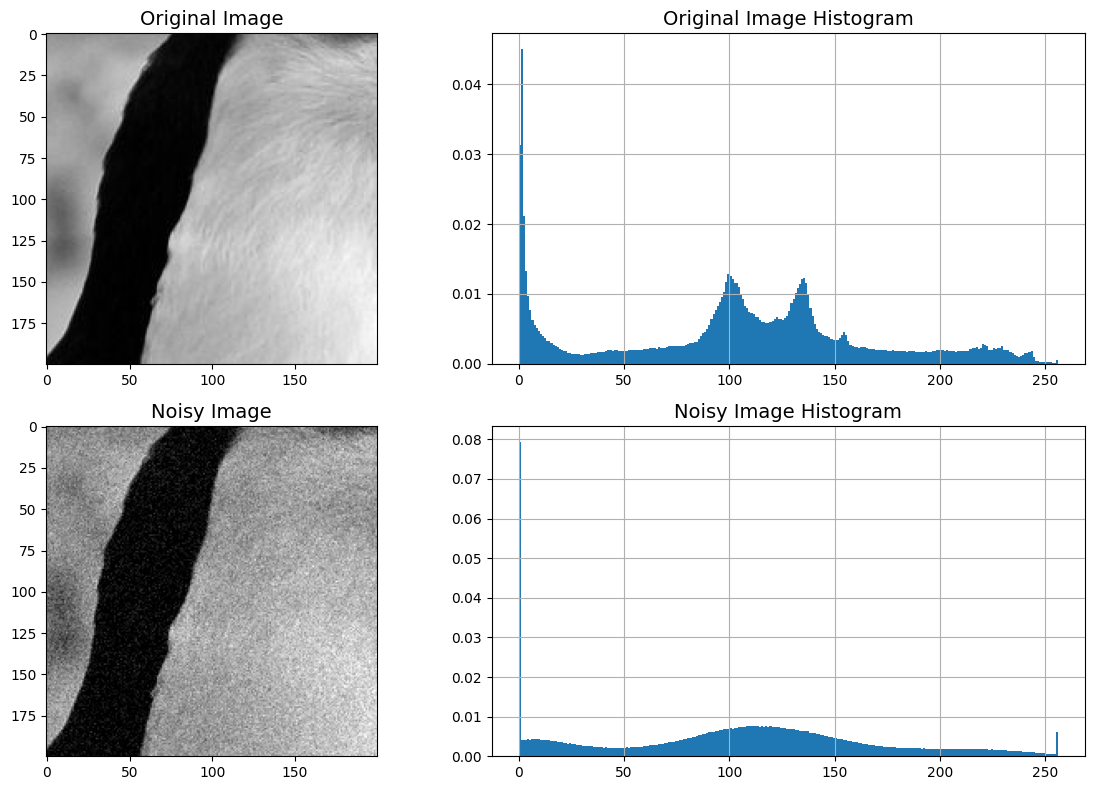

In [22]:
# Question 3

# TODO: Add noise to toucan_image
noise_mean = 0
noise_std = 0.07
noise_variance = np.power(noise_std,2)

noisy_image = util.random_noise(toucan_image, mode='gaussian', mean=noise_mean, var=noise_variance)
noisy_image = (noisy_image * 255).astype(np.uint8)

# Show a patch from the original image and its histogram
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(toucan_image[200:400, 200:400], cmap='gray')
plt.title('Original Image', fontsize=14)

plt.subplot(2, 2, 2)
plt.title('Original Image Histogram', fontsize=14)
# TODO: Compute and show the histogram using the 'plt.hist' function with the following parameters:
#  - 'toucan_image.ravel()' flattens the 2D array into a 1D array
#  - 'bins=N' divides the range of pixel values into N equal-width bins
#  - 'range=(0, 256)' specifies the range of pixel values to be considered in the histogram
#  - 'density=True' normalizes the histogram to represent probability densities on the y-axis

plt.hist(toucan_image.ravel(),bins=256,range=(0, 256),density=True)

plt.grid(True)

# Show the same patch of the noisy image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(noisy_image[200:400, 200:400], cmap='gray')
plt.title('Noisy Image', fontsize=14)

plt.subplot(2, 2, 4)
# TODO: Compute and show the histogram using the 'plt.hist' function as before
plt.hist(noisy_image.ravel(),bins=256,range=(0, 256),density=True)

plt.title('Noisy Image Histogram', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()


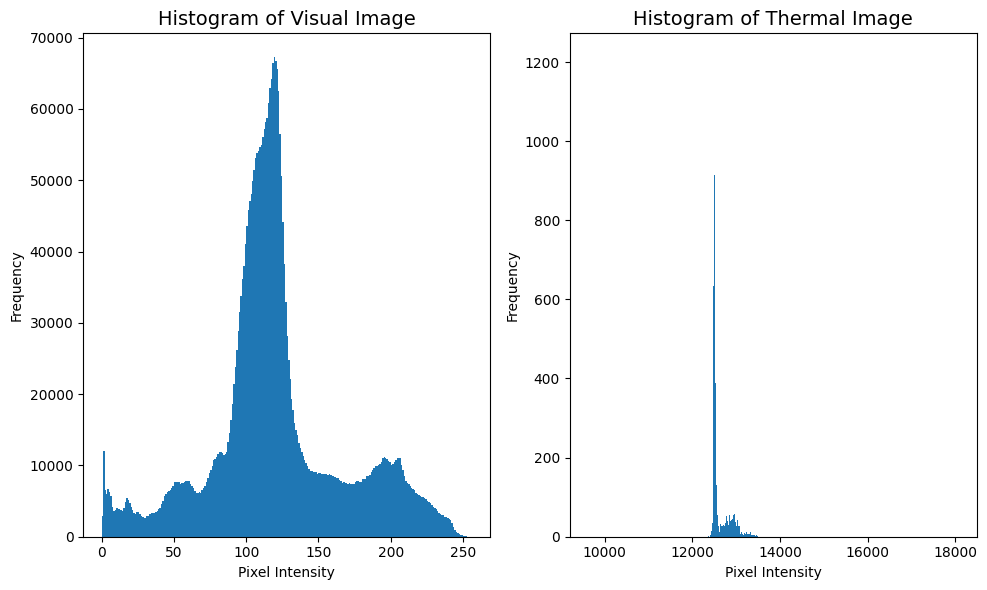

In [25]:
# Question 4

# Show visual image histogram
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(visual_image_naknik.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Visual Image', fontsize=14)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# TODO: Read thermal image
thermal_image = thermal_prep('nakniktherm.jpg')

# Show thermal image histogram
plt.subplot(1, 2, 2)
plt.hist(thermal_image.ravel(), bins=THERMAL_NUM_BINS, range=(THERMAL_MIN_VAL, THERMAL_MAX_VAL+1))
plt.title('Histogram of Thermal Image', fontsize=14)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [26]:
# Question 5

# Run histogram adjustment app
!python code/hist_adjust_app.py


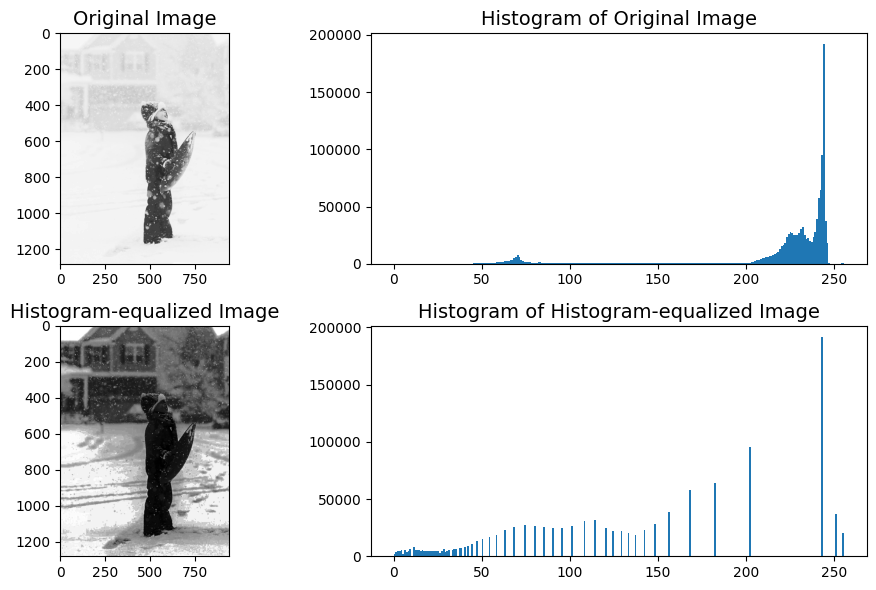

In [28]:
# Question 8
snow_image = io.imread('images/snow.jpg')

# TODO: Apply histogram equalization to 'snow_image' using the 'exposure.equalize_hist' function
im_eq = exposure.equalize_hist(snow_image)
im_eq = util.img_as_ubyte(im_eq) # convert back to uint8

plt.figure(figsize=(10, 6))

# Show the original image and its histogram
plt.subplot(2, 2, 1)
plt.imshow(snow_image, cmap='gray')
plt.title('Original Image', fontsize=14)

plt.subplot(2, 2, 2)
plt.hist(snow_image.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Original Image', fontsize=14)

# Show the histogram-equalized image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(im_eq, cmap='gray')
plt.title('Histogram-equalized Image', fontsize=14)

plt.subplot(2, 2, 4)
plt.hist(im_eq.ravel(), bins=256, range=(0, 256))
plt.title('Histogram of Histogram-equalized Image', fontsize=14)

plt.tight_layout()
plt.show()


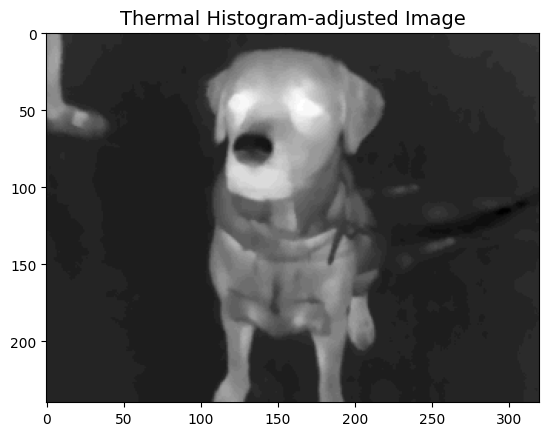

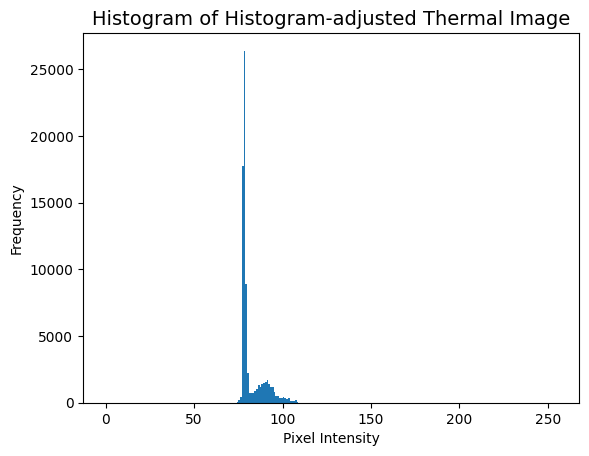

In [77]:
# Question 9

# TODO: Adjust the histogram of the thermal image (in uint8 format)
#       You can try:
#           Contrast stretching - multiplication by a constant
#           Brigthness enhancement - addition of a constant
#           Gamma correction - using the 'exposure.adjust_gamma' function
#           Histgram equalization - using the 'exposure.equalize_hist' function and then the 'util.img_as_ubyte' function
thermal_adjusted = exposure.adjust_gamma(thermal_image_uint8_naknik, 1.1)
# Show the histogram-adjusted thermal image and its histogram
plt.imshow(thermal_adjusted, cmap='gray')
plt.title('Thermal Histogram-adjusted Image', fontsize=14)
plt.show()
plt.hist(thermal_adjusted.ravel(), bins=255, range=(0, 255))
plt.title('Histogram of Histogram-adjusted Thermal Image', fontsize=14)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


# Assignment 3 - Edge Detection


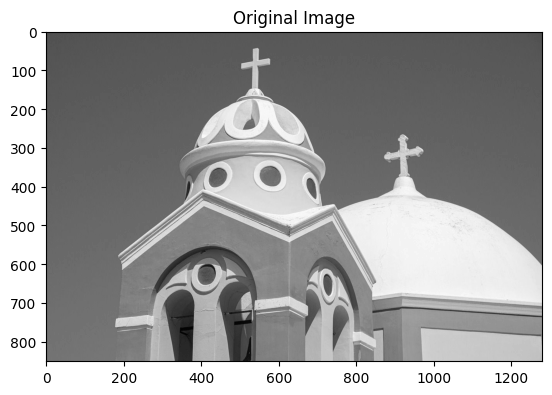

In [60]:
# Question 1

# Load and show image
church_image = io.imread('images/church.jpg')
plt.figure()
plt.imshow(church_image, cmap='gray')
plt.title('Original Image')
plt.show()


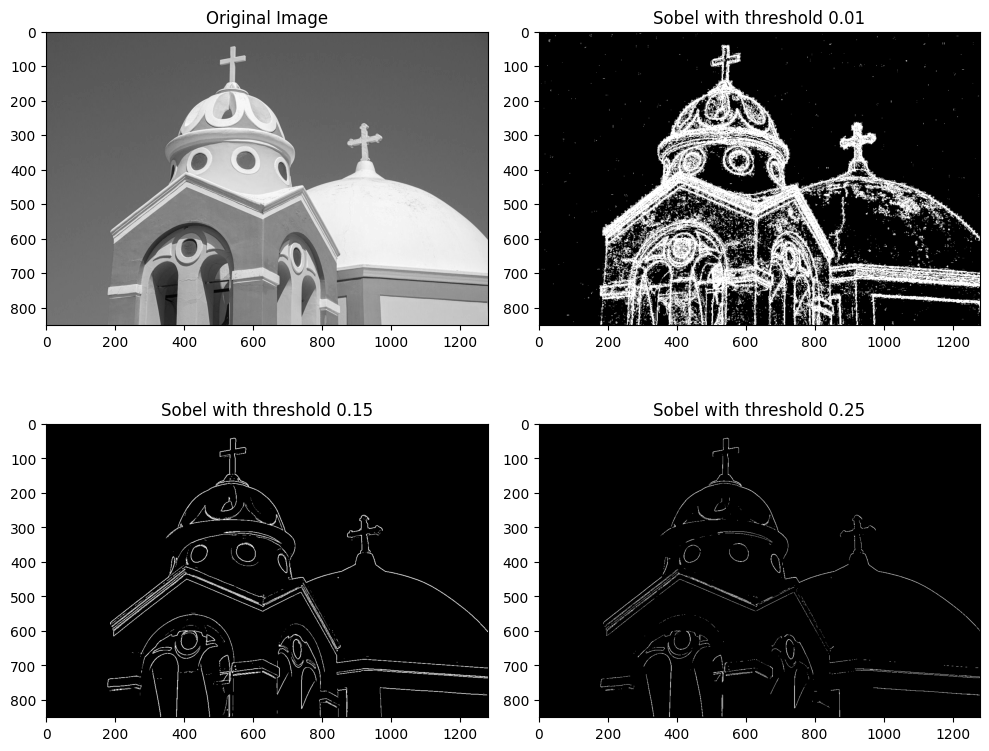

In [61]:
# Sobel edge detector

def sobel_edge_detection(image, threshold):
    """
    Detects edges in an image using Sobel edge detector.

    Args:
        image (np.ndarray): The input image, assumed to be grayscale.
        threshold: Gradients threshold for edge detection.

    Returns:
      np.ndarray: Image with edges.
    """
    gradients = filters.sobel(image)                # Apply Sobel filter
    edges = gradients > threshold                   # Apply threshold to the gradients

    return edges.astype(np.float32)


sobel_thresholds = np.array([0.01, 0.15, 0.25])

# TODO: Apply Sobel edge detector with different threshold values
sobel_edges_1 = sobel_edge_detection(church_image, 0.01)
sobel_edges_2 = sobel_edge_detection(church_image, 0.15)
sobel_edges_3 = sobel_edge_detection(church_image, 0.25)

# Show the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(church_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(sobel_edges_1, cmap='gray')
plt.title(f'Sobel with threshold {sobel_thresholds[0]}')

plt.subplot(2, 2, 3)
plt.imshow(sobel_edges_2, cmap='gray')
plt.title(f'Sobel with threshold {sobel_thresholds[1]}')

plt.subplot(2, 2, 4)
plt.imshow(sobel_edges_3, cmap='gray')
plt.title(f'Sobel with threshold {sobel_thresholds[2]}')

plt.tight_layout()
plt.show()


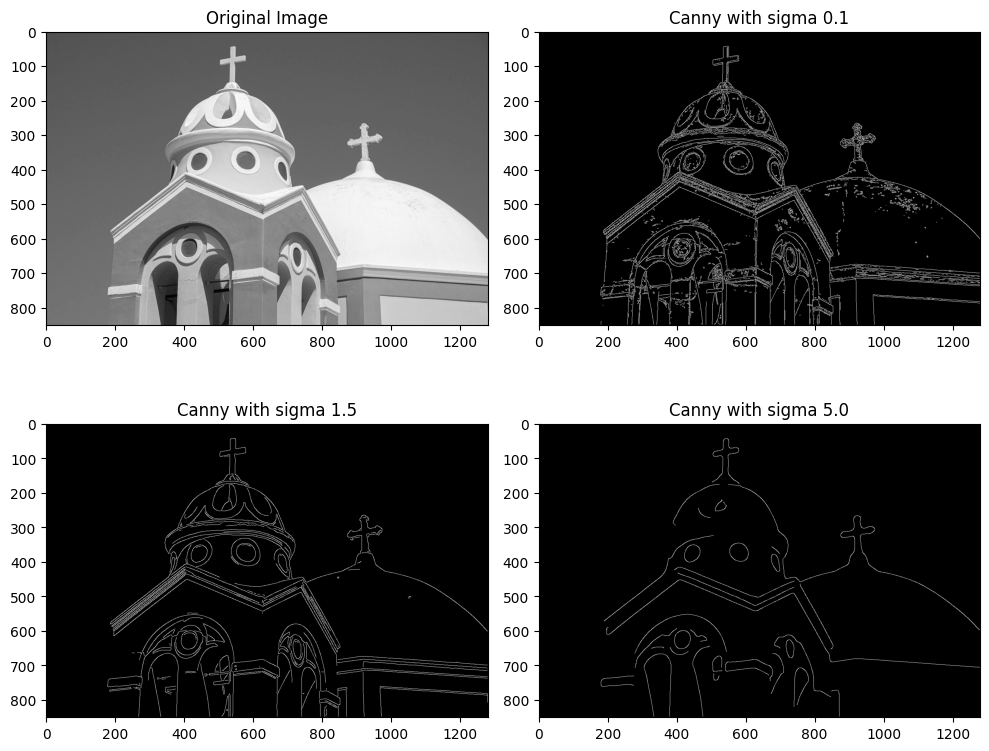

In [72]:
# Canny edge detector

canny_low_threshold = 35
canny_sigmas = np.array([0.1, 1.5, 5])

# TODO: Apply Canny edge detector with different sigma values
canny_edges_1 = feature.canny(church_image, sigma=0.1, low_threshold=35)
canny_edges_2 = feature.canny(church_image, sigma=1.5, low_threshold=35)
canny_edges_3 = feature.canny(church_image, sigma=5, low_threshold=35)

# Show the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(church_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(canny_edges_1, cmap='gray')
plt.title(f'Canny with sigma {canny_sigmas[0]}')

plt.subplot(2, 2, 3)
plt.imshow(canny_edges_2, cmap='gray')
plt.title(f'Canny with sigma {canny_sigmas[1]}')

plt.subplot(2, 2, 4)
plt.imshow(canny_edges_3, cmap='gray')
plt.title(f'Canny with sigma {canny_sigmas[2]}')

plt.tight_layout()
plt.show()


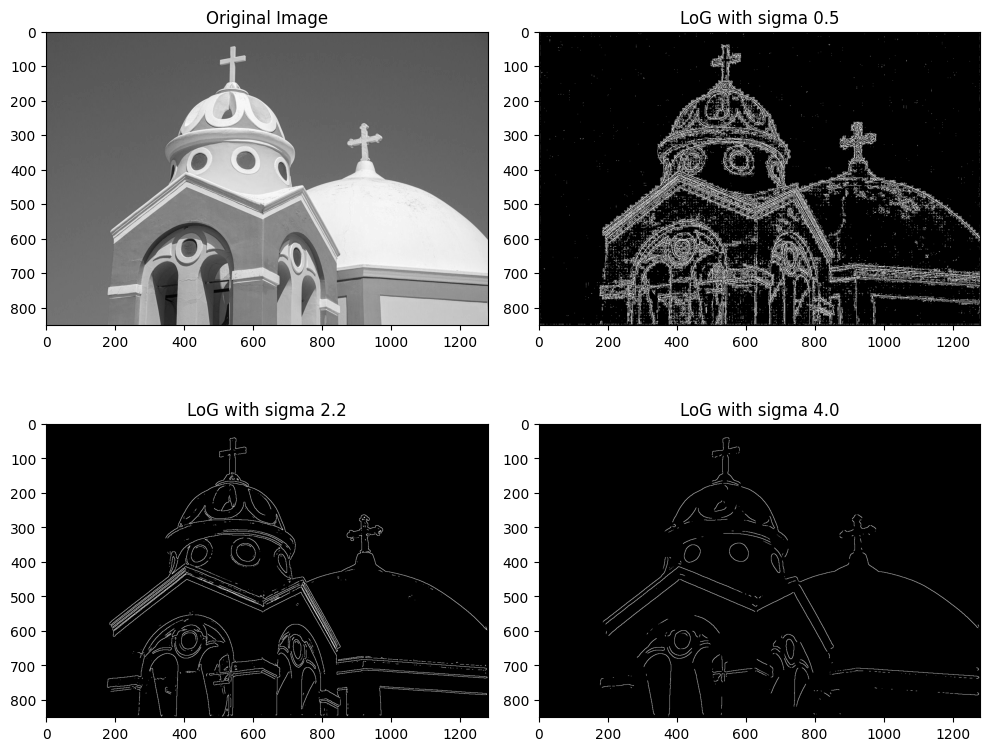

In [74]:
# Laplacian of Gaussian edge detector

def LoG_edge_detection(image, sigma=1.0, threshold=0.1):
    """
    Detects edges in an image using Laplacian of Gaussian detector.

    Args:
        image (np.ndarray): The input image, assumed to be grayscale.
        sigma (float, optional): The standard deviation of the Gaussian filter. Default is 1.0.
        threshold (float, optional): The threshold for edge detection. Default is 0.1.

    Returns:
        np.ndarray: Image with edges.
    """

    blurred = filters.gaussian(image, sigma=sigma, mode='constant', cval=0.0)
    LoG = filters.laplace(blurred)
    th = 10 * np.abs(LoG).mean() * threshold        # Calculate threshold

    output = np.zeros(LoG.shape)
    width = output.shape[1]
    height = output.shape[0]

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            patch = LoG[y-1:y+2, x-1:x+2]           # Get 3x3 patch
            if patch[1,1]<0:                        # Check all cases of [-] in the middle
                if (patch.max()>0) and (patch.max()-patch[1,1]>th):
                    output[y, x] = 1;
            elif patch[1,1]==0:
                if (np.sign(patch[0,1])*np.sign(patch[2,1])<0) and (np.abs(patch[2,1]-patch[0,1])>th): # Check [- 0 +]', [+ 0 -]'
                    output[y, x] = 1;
                if (np.sign(patch[1,0])*np.sign(patch[1,2])<0) and (np.abs(patch[1,2]-patch[1,0])>th): # Check [- 0 +], [+ 0 -]
                    output[y, x] = 1;
                if (np.sign(patch[0,0])*np.sign(patch[2,2])<0) and (np.abs(patch[2,2]-patch[0,0])>th): # Check main diagonal
                    output[y, x] = 1;
                if (np.sign(patch[2,0])*np.sign(patch[0,2])<0) and (np.abs(patch[0,2]-patch[2,0])>th): # Check inverse diagonal
                    output[y, x] = 1;

    return output


LoG_threshold = 0.2
LoG_sigmas = np.array([0.5, 2.2, 4])

# TODO: Apply Laplacian of Gaussian edge detector with different sigma values
LoG_edges_1 = LoG_edge_detection(church_image, 0.5, 0.2)
LoG_edges_2 = LoG_edge_detection(church_image, 2.2, 0.2)
LoG_edges_3 = LoG_edge_detection(church_image, 4, 0.2)

# Show the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(church_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(LoG_edges_1, cmap='gray')
plt.title(f'LoG with sigma {LoG_sigmas[0]}')

plt.subplot(2, 2, 3)
plt.imshow(LoG_edges_2, cmap='gray')
plt.title(f'LoG with sigma {LoG_sigmas[1]}')

plt.subplot(2, 2, 4)
plt.imshow(LoG_edges_3, cmap='gray')
plt.title(f'LoG with sigma {LoG_sigmas[2]}')

plt.tight_layout()
plt.show()


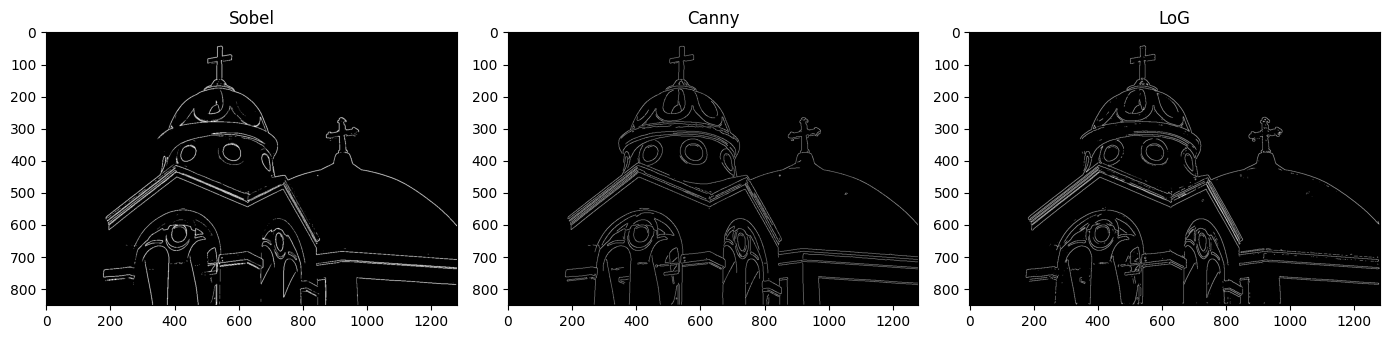

In [79]:
# Question 2

# TODO: Select best edge detection results from the previous question
best_sobel = sobel_edges_2
best_canny = canny_edges_2
best_LoG = LoG_edges_2

plt.figure(figsize=(14, 14))

plt.subplot(1, 3, 1)
plt.imshow(best_sobel, cmap='gray')
plt.title('Sobel')

plt.subplot(1, 3, 2)
plt.imshow(best_canny, cmap='gray')
plt.title('Canny')

plt.subplot(1, 3, 3)
plt.imshow(best_LoG, cmap='gray')
plt.title('LoG')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Thermal')

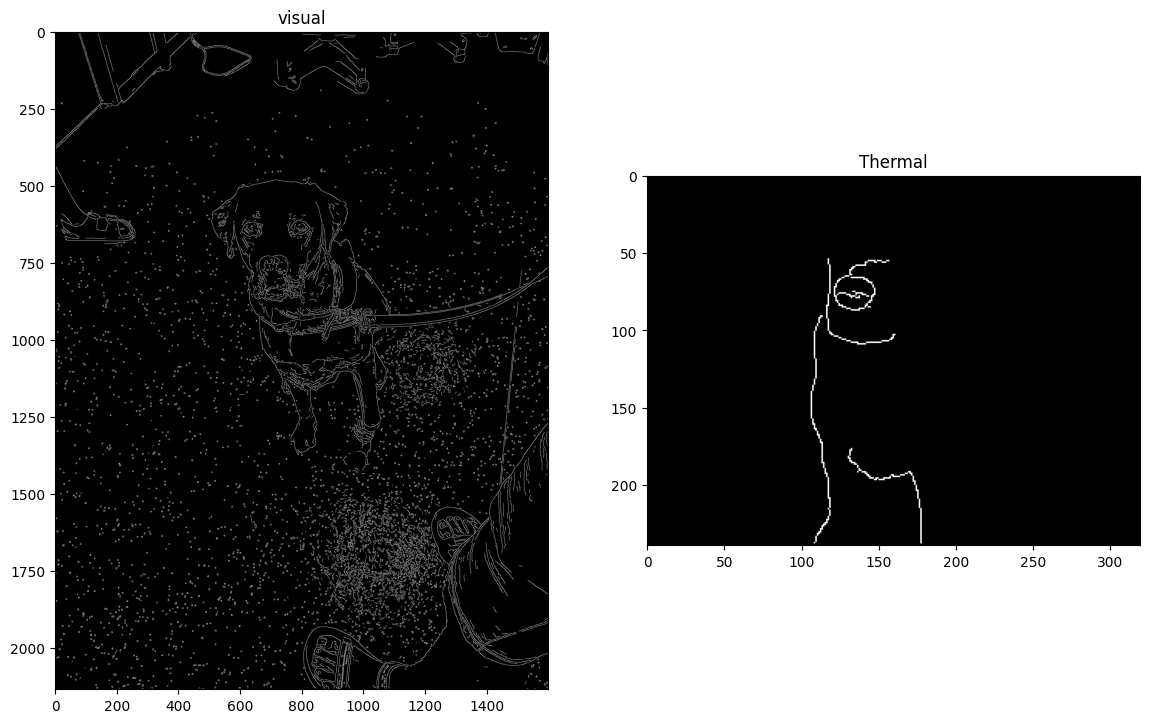

In [87]:
# Question 3

# TODO: Perform Canny edge detection for a visual image you took and show the result
canny_edges_naknik = feature.canny(visual_image_naknik, sigma=1.5, low_threshold=35)
canny_edges_Tnaknik = feature.canny(thermal_image_uint8_naknik, sigma=0.15, low_threshold=2)
# TODO: Perform Canny edge detection for a thermal image you took of the same scene
#       as the visual image and show the result (use the thermal image in uint8 format)
plt.figure(figsize=(14, 14))

plt.subplot(1, 2, 1)
plt.imshow(canny_edges_naknik, cmap='gray')
plt.title('visual')

plt.subplot(1, 2, 2)
plt.imshow(canny_edges_Tnaknik, cmap='gray')
plt.title('Thermal')


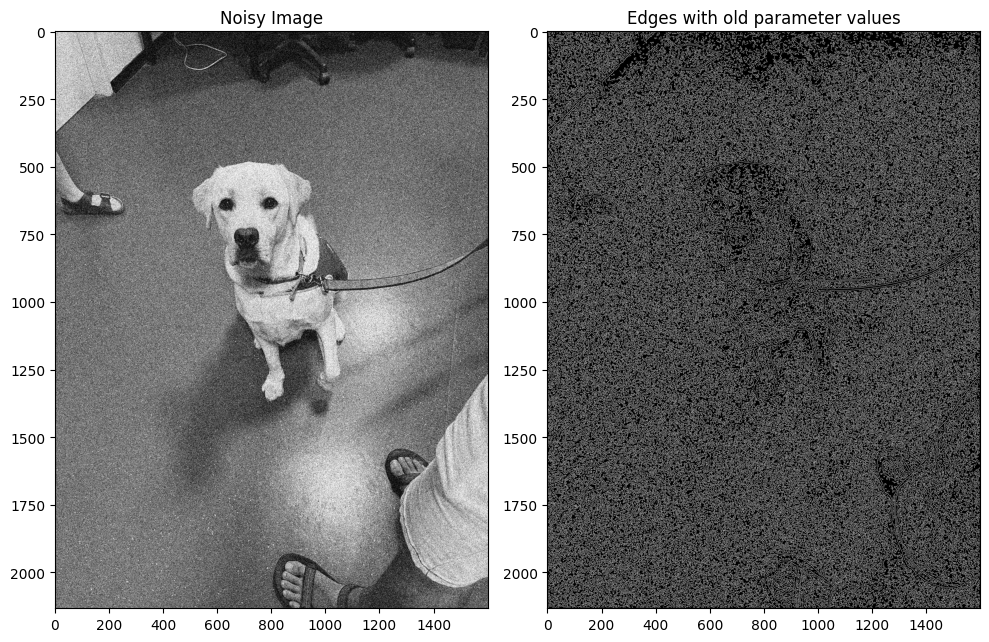

In [102]:
# Question 4

noise_std = 0.22
noise_variance = np.power(noise_std,2)
noise_mean = 0

noisy_image = util.random_noise(visual_image_naknik, mode='gaussian', mean=noise_mean, var=noise_variance)
noisy_image = (noisy_image * 255).astype(np.uint8)

# TODO: Perform Canny edge detection for the noisy visual image with the same
#       parameter values as in the previous question
noisy_image_edges = feature.canny(noisy_image, sigma=1.5, low_threshold=35)

# Show the results
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image_edges, cmap='gray')
plt.title('Edges with old parameter values')

plt.tight_layout()
plt.show()


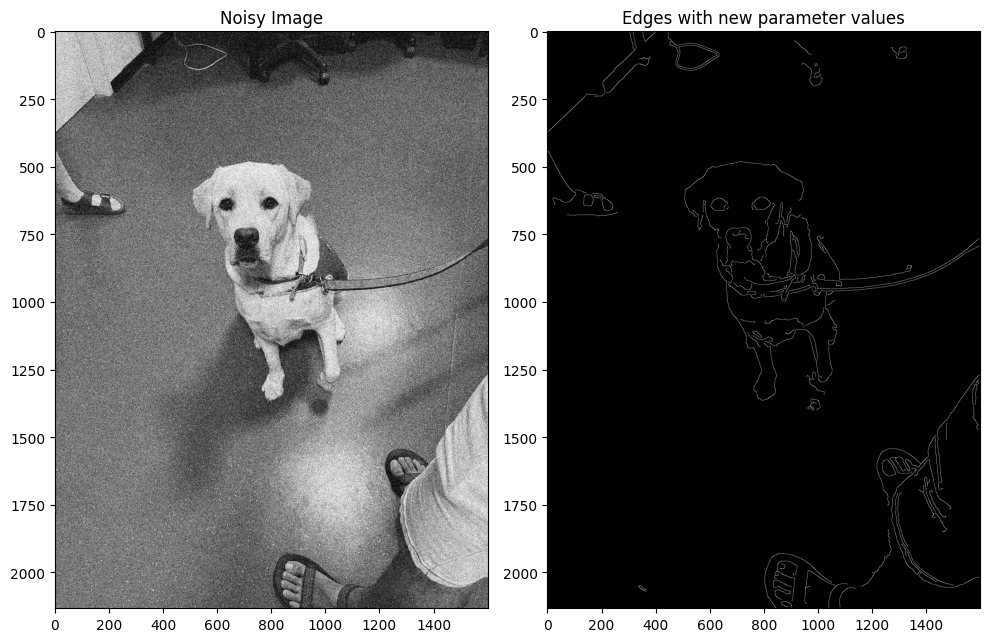

In [100]:
# Question 5

# TODO: Perform Canny edge detection for the noisy visual image with better parameter values
noisy_image_edges_better = feature.canny(noisy_image, sigma=3, low_threshold=1)

# Show the results
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image_edges_better, cmap='gray')
plt.title('Edges with new parameter values')

plt.tight_layout()
plt.show()


# Assignment 4 - Thresholding and Morphological Operations


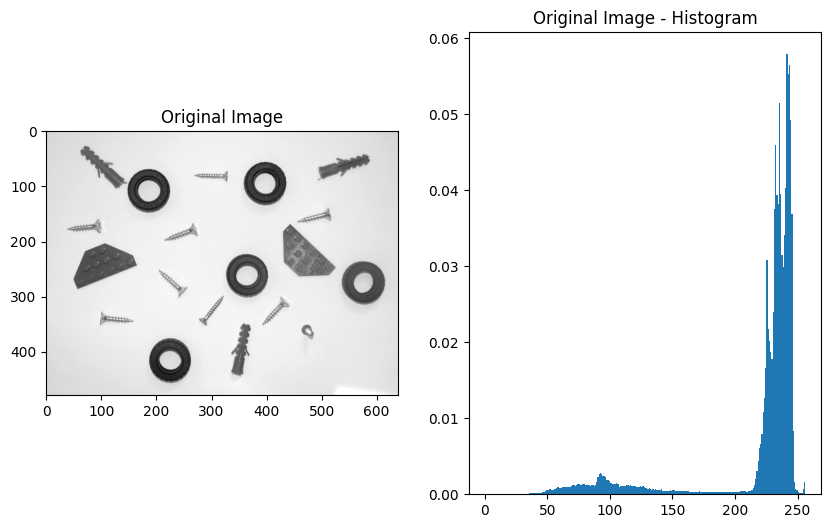

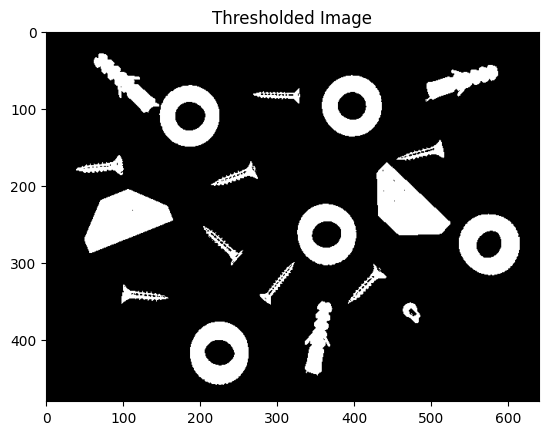

In [111]:
# Question 1

# Load the image and show it and its histogram
pieces_image = io.imread('images/pieces.png')
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(pieces_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.hist(pieces_image.ravel(), bins=256, range=[0, 256], density= True)
plt.title('Original Image - Histogram')

plt.show()

# TODO: Set threshold value for binarization
pieces_thresh = 200

# TODO: Perform thresholding: pixels with intensity less than the threshold
#       become True (white), others become False (black)
pieces_image_bw = pieces_image<pieces_thresh

# Convert the boolean array to uint8 format
pieces_image_bw = pieces_image_bw.astype(np.uint8)

# Show the thresholded image
plt.figure()
plt.imshow(pieces_image_bw, cmap='gray')
plt.title('Thresholded Image')
plt.show()


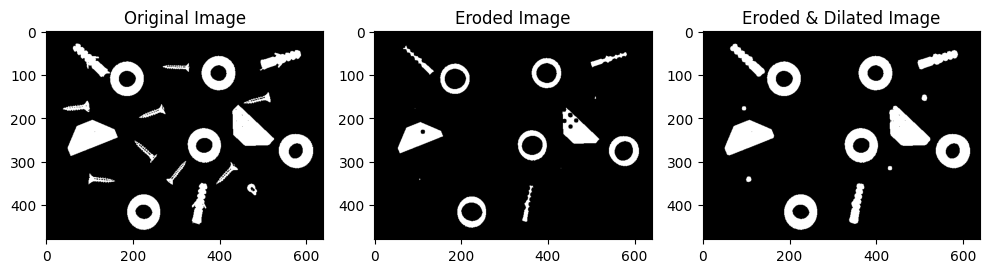

In [115]:
# Question 2
radius= 5
# TODO: Create structuring element. Possible structuring elements are:
#       'morphology.disk', 'morphology.ellipse',
#       'morphology.square', 'morphology.rectangle'
#       'morphology.diamond', 'morphology.octagon'
strel = morphology.disk(radius)

# TODO: Perform erosion on the binary image with the structuring element
#       using the 'morphology.erosion' function
pieces_eroded = morphology.erosion(pieces_image_bw, strel)

# TODO: Perform dilation on the pieces_eroded image with the same structuring
#       element using the 'morphology.dilation' function
pieces_final = morphology.dilation(pieces_eroded, strel)

# Show results
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.imshow(pieces_image_bw, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(pieces_eroded, cmap='gray')
plt.title('Eroded Image')

plt.subplot(1, 3, 3)
plt.imshow(pieces_final, cmap='gray')
plt.title('Eroded & Dilated Image')

plt.tight_layout()
plt.show()


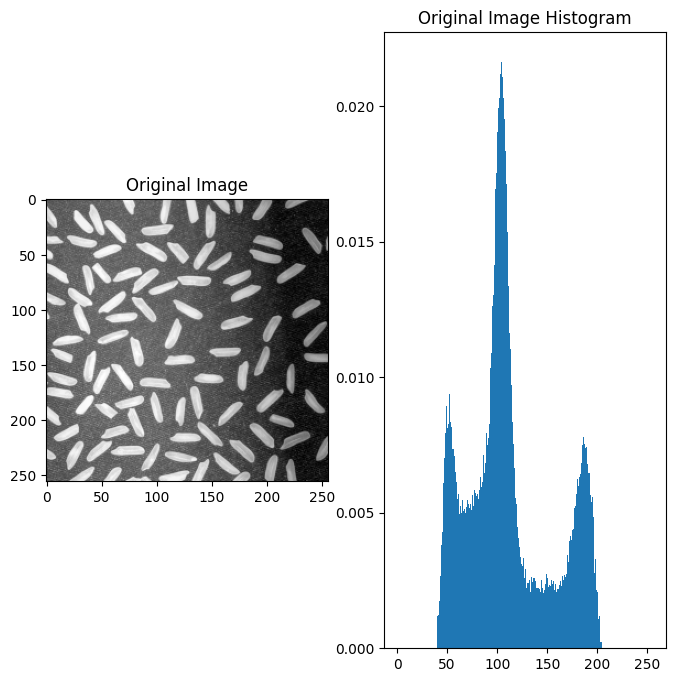

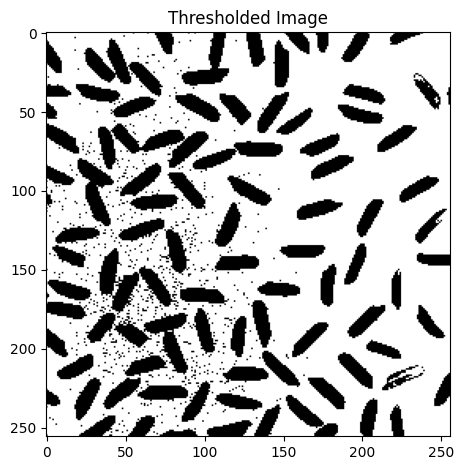

In [118]:
# Question 3

# Load the image and show it and its histogram
rice_image = io.imread('images/rice.png', as_gray=True).astype(np.float32)
rice_image = (rice_image * 255).astype(np.uint8)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(rice_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.hist(rice_image.ravel(), bins=256, range=[0, 256], density= True)
plt.title('Original Image Histogram')

# TODO: Set threshold value for binarization
rice_thresh = 120

# TODO: Perform thresholding: pixels with intensity less than the threshold
#       become False (black), others become True (white)
rice_image_bw = rice_image<rice_thresh

# Convert the boolean array to uint8 format
rice_image_bw = rice_image_bw.astype(np.uint8)

# Show the thresholded image
plt.figure()
plt.imshow(rice_image_bw, cmap='gray')
plt.title('Thresholded Image')
plt.tight_layout()
plt.show()


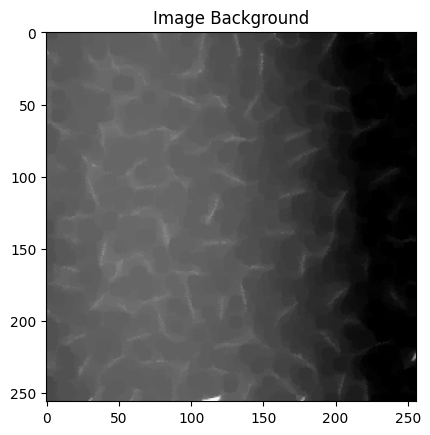

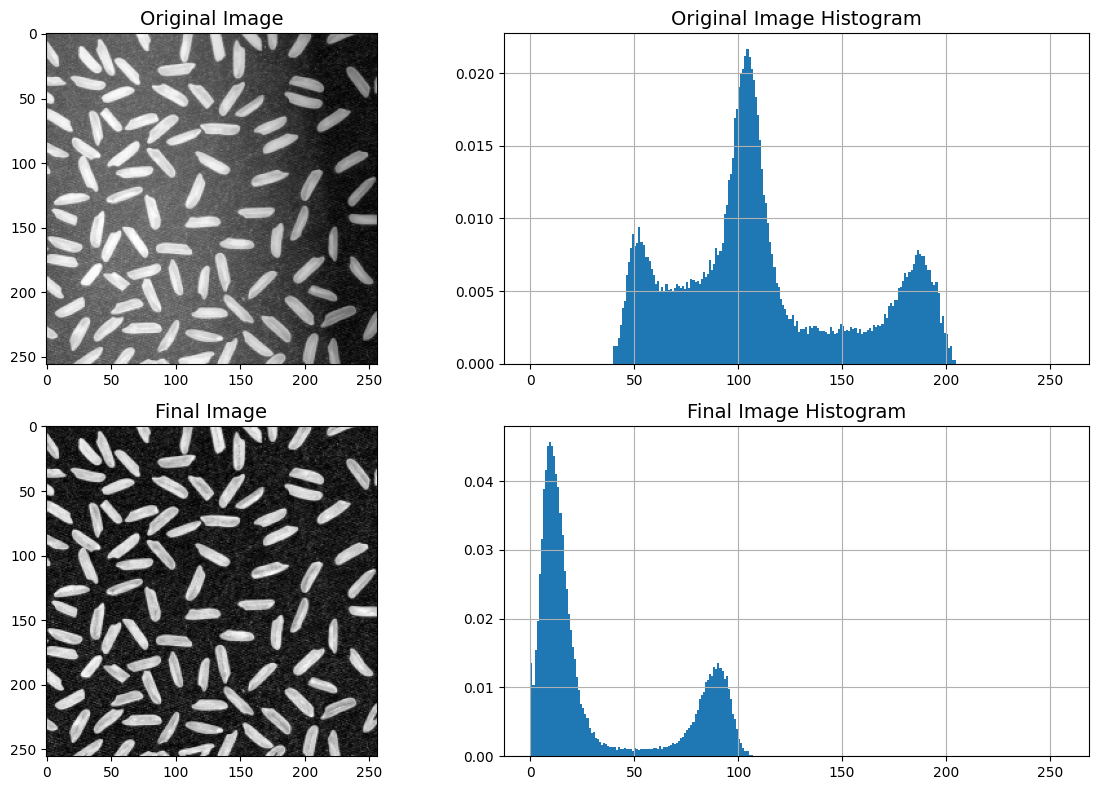

In [124]:
# Question 4

# TODO: Create a disk structuring element
strel2 = morphology.disk(radius)

# TODO: Use the structing element on the grayscale image to remove the rice grains
rice_no_grains = morphology.erosion(rice_image, strel2)

plt.imshow(rice_no_grains, cmap='gray')
plt.title('Image Background')
plt.show()

# TODO: Subtract rice_no_grains from the original image
rice_final = rice_image-rice_no_grains

# Show original image and resulting image with their histograms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(rice_image, cmap='gray')
plt.title('Original Image', fontsize=14)

plt.subplot(2, 2, 2)
plt.title('Original Image Histogram', fontsize=14)
plt.hist(rice_image.ravel(), bins=256, range=(0, 256), density=True)
plt.grid(True)

plt.subplot(2, 2, 3)
plt.imshow(rice_final, cmap='gray')
plt.title('Final Image', fontsize=14)

plt.subplot(2, 2, 4)
plt.hist(rice_final.ravel(), bins=256, range=(0, 256), density=True)
plt.title('Final Image Histogram', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()


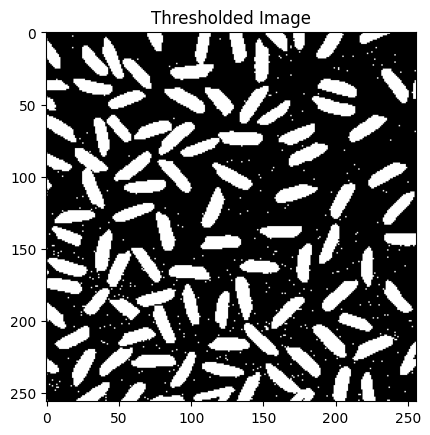

In [126]:
# Question 5

# TODO: Set threshold value for binarization
rice_thresh2 = 30

# TODO: Perform thresholding: pixels with intensity less than the threshold
#       become False (black), others become True (white)
rice_image_bw2 = rice_final>rice_thresh2

plt.figure()
plt.imshow(rice_image_bw2, cmap='gray')
plt.title('Thresholded Image')
plt.show()


# Assignment 5 - Region Properties


Number of connected components: 27


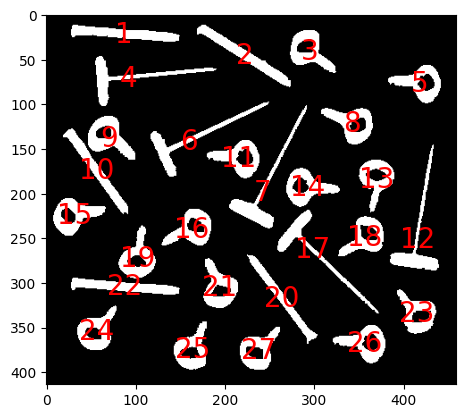

In [127]:
# Question 1

objects_image = io.imread('images/objects.bmp')

# Apply connected component labeling
objects_label_image = measure.label(objects_image, connectivity=2)

# Calculate region properties
object_properties = measure.regionprops(objects_label_image)

# Print the number of connected components
components_num = len(object_properties)
print(f'Number of connected components: {components_num}')

# Display the original image with labeled regions
plt.imshow(objects_image, cmap='gray')
for region in object_properties:
    plt.text(region.centroid[1], region.centroid[0], region.label, color='red', fontsize=20, ha='center', va='center')
plt.show()


In [128]:
# Question 2

# TODO: Choose a specific object
object_num = 1
specific_object_properties = object_properties[object_num]
property_lst = ["area", "area_bbox", "area_convex", "perimeter", "centroid_local", "extent",
                "axis_major_length", "axis_minor_length", "orientation", "eccentricity",
                "solidity", "euler_number"]

# Print object properties
print(f"Properties of object #{object_num}:")
for property_name  in property_lst:
    property_value = getattr(specific_object_properties, property_name)
    print(f"  {property_name}: {property_value:}")


Properties of object #1:
  area: 1261.0
  area_bbox: 7350.0
  area_convex: 1583.0
  perimeter: 274.7766952966369
  centroid_local: [33.50277557 52.76605868]
  extent: 0.17156462585034013
  axis_major_length: 137.723705614911
  axis_minor_length: 12.27854654095234
  orientation: 1.012343444034672
  eccentricity: 0.9960179006519467
  solidity: 0.7965887555274794
  euler_number: 1


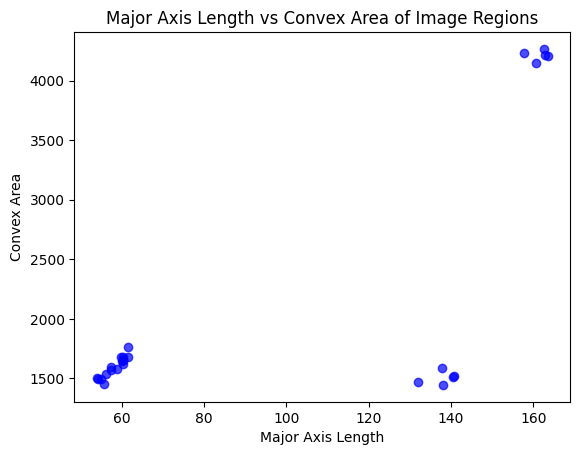

In [131]:
# Question 3

# Extract Major Axis Length and Convex Area of all image objects
major_axis_length = []
convex_area = []

for i in range (components_num):
    specific_object_properties = object_properties[i]
    property_value_1 = getattr(specific_object_properties, 'axis_major_length')
    major_axis_length.append(property_value_1)
    property_value_2 = getattr(specific_object_properties, 'area_convex')
    convex_area.append(property_value_2)

# Show scatter plot of the two properties
plt.figure()
plt.scatter(major_axis_length, convex_area, marker='o', color='blue', alpha=0.7)
plt.title('Major Axis Length vs Convex Area of Image Regions')
plt.xlabel('Major Axis Length')
plt.ylabel('Convex Area')
plt.show()


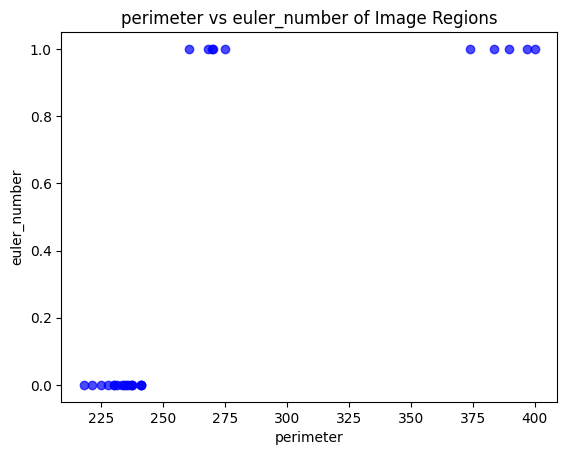

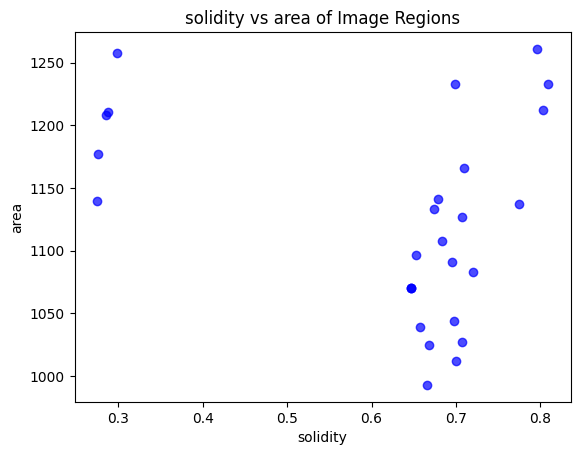

In [132]:
# Question 4

# TODO: Show two scatter plots like in the previous question but with different properties
#       (each scatter plot should contain two properites that were not used before)

#first time
# Extract Major Axis Length and Convex Area of all image objects
euler_number = []
perimeter = []
for object_num in range(27):
    specific_object_properties = object_properties[object_num]
    property_lst = ["euler_number", "perimeter"]

    ec_value = getattr(specific_object_properties, "euler_number")
    euler_number.append(ec_value)
    
    axis_value = getattr(specific_object_properties, "perimeter")
    perimeter.append(axis_value)
# Show scatter plot of the two properties
plt.figure()
plt.scatter(perimeter, euler_number, marker='o', color='blue', alpha=0.7)
plt.title('perimeter vs euler_number of Image Regions')
plt.xlabel('perimeter')
plt.ylabel('euler_number')
plt.show()

#second time

# Extract Major Axis Length and Convex Area of all image objects
area = []
solidity = []
for object_num in range(27):
    specific_object_properties = object_properties[object_num]
    property_lst = ["area", "solidity"]

    ec_value = getattr(specific_object_properties, "area")
    area.append(ec_value)
    
    axis_value = getattr(specific_object_properties, "solidity")
    solidity.append(axis_value)
# Show scatter plot of the two properties
plt.figure()
plt.scatter(solidity, area, marker='o', color='blue', alpha=0.7)
plt.title('solidity vs area of Image Regions')
plt.xlabel('solidity')
plt.ylabel('area')
plt.show()

# Assignment 6 - Line Detection


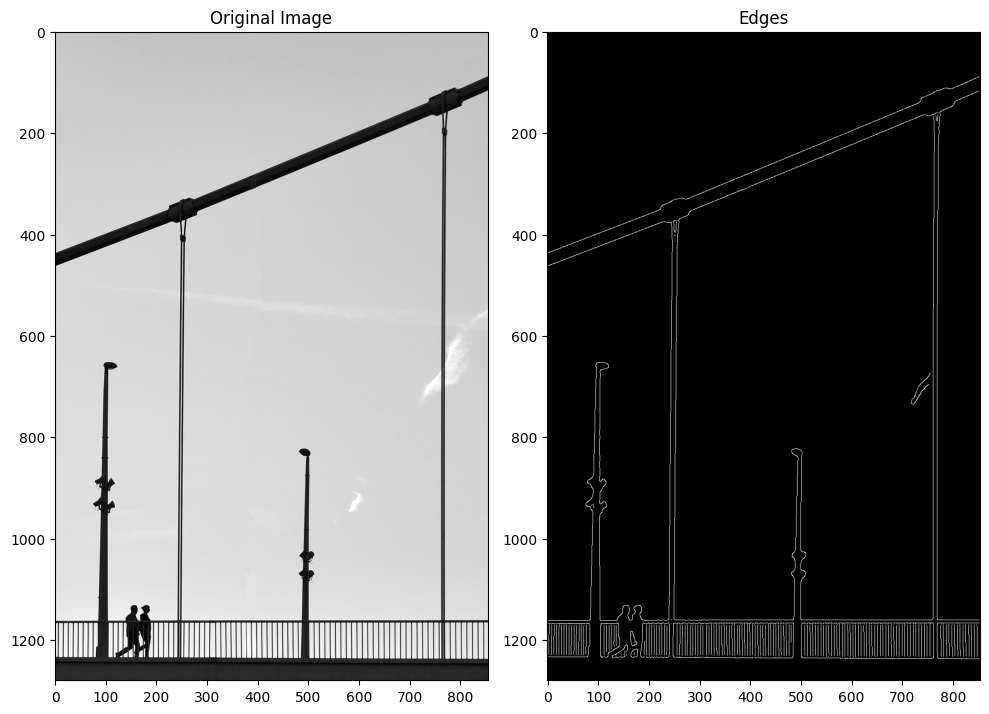

In [136]:
# Question #1

bridge_image = io.imread('images/bridge.jpg', as_gray=True)

# TODO: Apply Canny edge detection using the 'feature.canny' function
bridge_edges = feature.canny(bridge_image, sigma=2.5, low_threshold=0)

# Show image and edges
plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.imshow(bridge_image, cmap=plt.cm.gray)
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(bridge_edges, cmap=plt.cm.gray)
plt.title('Edges')

plt.tight_layout()
plt.show()


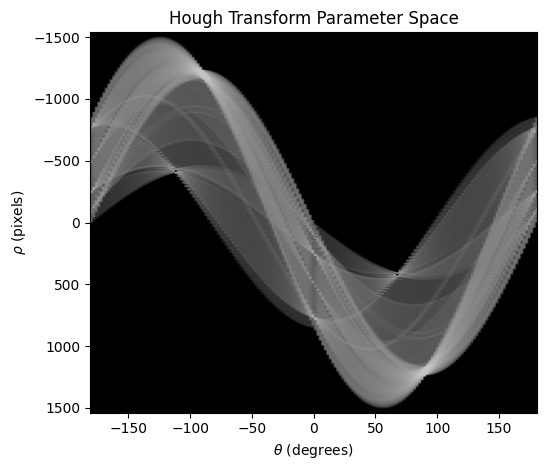

In [141]:
# Question 2

# TODO: Compute Hough transform between the angles -pi and pi using the function 'transofrm.hough_line'
hough_space, angles, distances = transform.hough_line(bridge_edges, theta =np.linspace(-np.pi, np.pi, num =180))

# Show Hough parameter space
plt.figure()
angle_step = 0.5 * np.diff(angles).mean()
distance_step = 0.5 * np.diff(distances).mean()
bounds = [
    np.rad2deg(angles[0] - angle_step),
    np.rad2deg(angles[-1] + angle_step),
    distances[-1] + distance_step,
    distances[0] - distance_step
]
plt.imshow(np.log(1 + hough_space), extent=bounds, cmap="gray", aspect=1/10)
plt.title('Hough Transform Parameter Space')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel(r'$\rho$ (pixels)')
plt.tight_layout()
plt.show()


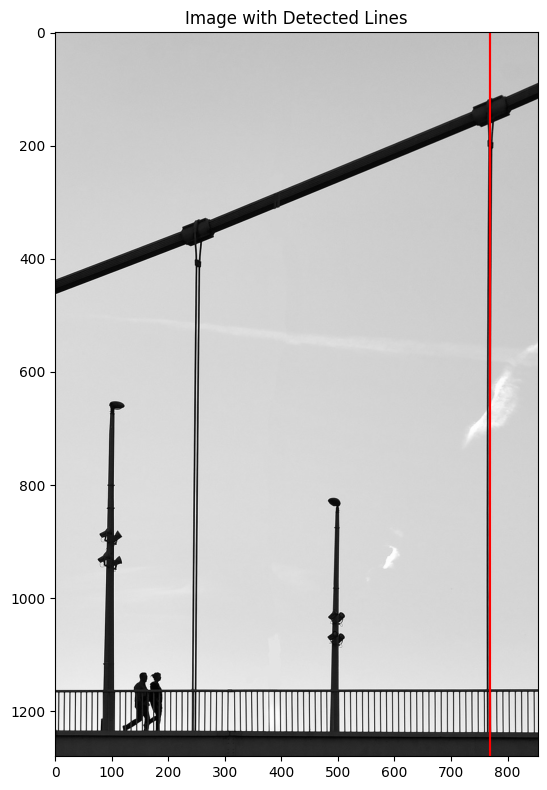

In [151]:
# Questions 4 & 5

# Detect strong lines in the parameter space

# TODO: Set minimum intensity of peaks to detect (try differen values)
hough_peaks_threshold = 0.8
strong_peaks = transform.hough_line_peaks(
    hough_space, angles, distances, threshold=hough_peaks_threshold * np.max(hough_space))

strong_lines = []
for _, angle, distance in zip(*strong_peaks):
    x0, y0 = distance * np.array([np.cos(angle), np.sin(angle)])
    slope = np.tan(angle + np.pi/2)
    strong_lines.append(((x0, y0), slope))

bridge_image_rgb = color.gray2rgb(bridge_image)

# Show the image with detected lines in red
plt.figure(figsize=(10, 8))
axis = plt.imshow(bridge_image_rgb)
for (x0, y0), slope in strong_lines:
    plt.axline((x0, y0), slope=slope, color='red')
plt.title('Image with Detected Lines')
plt.tight_layout()
plt.show()
